In [1]:
# check if config exists
try:
    config
except NameError:
    config_exists = False
else:
    config_exists = True

# make config if it does not exist already (e.g. passed in by papermill)
if not(config_exists):
    # set up some config for the experiment run
    config = {
        "data_path" : "C:/Users/nico_/Desktop/ITBA/TFI/github/df_procesado/trollers_fe.csv",
    }
print(config)

{'data_path': 'C:/Users/nico_/Desktop/ITBA/TFI/github/df_procesado/trollers_fe.csv'}


In [2]:
import nltk
import sklearn

print('The nltk version is {}.'.format(nltk.__version__))
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The nltk version is 3.6.1.
The scikit-learn version is 1.0.2.


Cargamos el dataset.

In [3]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

df = pd.read_csv(config['data_path'], header="infer", sep=",",error_bad_lines=False, engine ='python')

In [4]:
df.groupby('is_fishing').head(3)

,mmsi,timestamp,distance_from_shore,distance_from_port,speed,course,lat,lon,is_fishing,source,...,J0_lag_3,J0_lag_4,J0_lag_5,J0_lag_6,C0_lag_1,C0_lag_2,C0_lag_3,C0_lag_4,C0_lag_5,C0_lag_6
0,1.670724e+14,1.339663e+09,17691.373047,26925.162109,6.3,0.830278,0.967198,0.251943,NO,gfw,...,1.341827e-09,-3.755191e-09,7.348684e-10,2.725702e-14,0.000049,-2.493796e-06,-7.935093e-05,3.860701e-04,-4.846542e-05,-8.437874e-06
1,1.670724e+14,1.339663e+09,14764.460938,25317.357422,6.4,0.855000,0.967377,0.251483,NO,gfw,...,-2.916805e-12,1.341827e-09,-3.755191e-09,7.348684e-10,-0.000005,4.885567e-05,-2.493796e-06,-7.935093e-05,3.860701e-04,-4.846542e-05
2,1.670724e+14,1.339727e+09,18027.312500,28634.939453,8.4,0.350833,0.967056,0.251651,NO,gfw,...,5.412987e-12,-2.916805e-12,1.341827e-09,-3.755191e-09,0.000037,-4.932398e-06,4.885567e-05,-2.493796e-06,-7.935093e-05,3.860701e-04
1834,2.740638e+14,1.425716e+09,8485.073242,9999.754883,2.1,0.233889,0.721769,0.635278,SI,gfw,...,-7.058984e-09,6.736133e-09,-2.004874e-11,3.968931e-09,-0.000636,7.490297e-07,4.485484e-06,-3.025624e-05,4.417586e-07,5.963165e-05
1835,2.740638e+14,1.425716e+09,9219.318359,10629.884766,2.5,0.277500,0.721778,0.635468,SI,gfw,...,2.067418e-12,-7.058984e-09,6.736133e-09,-2.004874e-11,0.000009,-6.362565e-04,7.490297e-07,4.485484e-06,-3.025624e-05,4.417586e-07
1836,2.740638e+14,1.425717e+09,9899.251953,11401.474609,2.2,0.197222,0.721801,0.635618,SI,gfw,...,1.750767e-09,2.067418e-12,-7.058984e-09,6.736133e-09,0.000055,9.416190e-06,-6.362565e-04,7.490297e-07,4.485484e-06,-3.025624e-05


In [5]:
import plotly.express as px
import pandas as pd

fig = px.line_geo(df,lat='lat',lon='lon', hover_name="speed", color='is_fishing',line_group='mmsi',markers=True)
fig.update_layout(title = 'asd', title_x=0.5,mapbox_style="open-street-map")
fig.show()


In [6]:
df = df.drop(['mmsi', 'source','timestamp','source','datetime','distance_from_shore','distance_from_port'], axis = 1)
print(df)


       speed    course       lat       lon is_fishing  sun_state   distance  \
0        6.3  0.830278  0.967198  0.251943         NO          1  12.460250   
1        6.4  0.855000  0.967377  0.251483         NO          1   3.130300   
2        8.4  0.350833  0.967056  0.251651         NO          1   2.251642   
3        8.3  0.372778  0.966446  0.252871         NO          1   8.629961   
4        7.7  0.268889  0.966132  0.253582         NO          1   4.921015   
...      ...       ...       ...       ...        ...        ...        ...   
13991    2.0  0.246667  0.996371  0.212425         NO          1   0.184542   
13992    2.7  0.116667  0.996361  0.212444         NO          1   0.134451   
13993    0.3  0.719722  0.996352  0.212436         NO          1   0.076645   
13994    4.4  0.808056  0.996348  0.212445         NO          1   0.063297   
13995    0.3  0.353889  0.996313  0.212339         NO          1   0.712027   

       timediff        S0            A0  ...      J

Generamos los vectores de train y test.

In [7]:
#Generamos train y test.

#Si la longitud del dataset es mayor a 10000, partiremos agrupado por "is_fishing" ya que nos puede tocar un conjunto con is_fishing='SI' vacio.
#if len(dataset)>10000:
    #df = df.sample(n=10000, random_state=1)
#    df = df.groupby("is_fishing").sample(n=7500, random_state=1,replace=True)
#    df = df.drop_duplicates()

X = df.drop('is_fishing',axis=1)
y = df['is_fishing']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=50)
print(len(df[df['is_fishing']=='SI']))
print(len(df[df['is_fishing']=='NO']))

1286
12710


Funcion para evaluar los modelos.

In [8]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from IPython.display import display, Markdown, Latex
import matplotlib.pyplot as plt
import tabulate
from sklearn.metrics import confusion_matrix, accuracy_score


def evaluate_model(title,y_test, y_pred):

    cm = confusion_matrix(y_test, y_pred)
    display(Markdown(title))
    cmd_obj = ConfusionMatrixDisplay(cm, display_labels=['NO', 'SI'])
    cmd_obj.plot()
    cmd_obj.ax_.set(
                    title='Matriz de confusión.', 
                    xlabel='Predict Values', 
                    ylabel='Actual Values')
    plt.show()
    _precision_score = precision_score(y_test, y_pred,pos_label='SI')
    _recall_score = recall_score(y_test, y_pred, pos_label='SI')
    _accuracy_score = accuracy_score(y_test, y_pred)
    _f1_score = f1_score(y_test, y_pred, pos_label='SI')

    data = [["Precision","Recall","Accuracy","F1"],
            ["%.2f" % _precision_score, "%.2f" % _recall_score, "%.2f" % _accuracy_score, "%.2f" % _f1_score ]]
    table = tabulate.tabulate(data, tablefmt='html')
    display(table)
    return _precision_score, _recall_score, _accuracy_score, _f1_score


Arboles de decision optimizado

Fitting 3 folds for each of 1440 candidates, totalling 4320 fits
Train Accuracy : 0.988
Test Accuracy : 0.956
Best Score Through Grid Search : 0.957
Best Parameters :  {'max_depth': 11, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_leaf': 2, 'min_weight_fraction_leaf': 0, 'splitter': 'best'}
Best Parameters :  {'max_depth': 11, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_leaf': 2, 'min_weight_fraction_leaf': 0, 'splitter': 'best'}


Arboles de decision optimizado

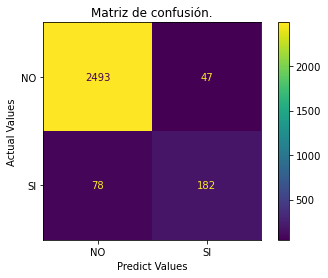

Precision,Recall,Accuracy,F1
0.79,0.70,0.96,0.74


In [9]:
from sklearn.tree import ExtraTreeClassifier
from sklearn.tree import DecisionTreeRegressor
#extra_tree_classifier = ExtraTreeClassifier(random_state=1)
#extra_tree_classifier.fit(X_train, y_train)

from sklearn.model_selection import GridSearchCV

parameters={"splitter":["best","random"],
            "max_depth" : [11,12,13,14,15,16],
           "min_samples_leaf":[1,2,3,4,5],
           "min_weight_fraction_leaf":[0, 0.1,0.2],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10] }

grid = GridSearchCV(DecisionTreeClassifier(random_state=1), cv=3, n_jobs=-1, verbose=3,
                    param_grid =parameters
                    )

grid.fit(X_train, y_train)

print('Train Accuracy : %.3f'%grid.best_estimator_.score(X_train, y_train))
print('Test Accuracy : %.3f'%grid.best_estimator_.score(X_test, y_test))
print('Best Score Through Grid Search : %.3f'%grid.best_score_)
print('Best Parameters : ',grid.best_params_)

dt = DecisionTreeClassifier(max_depth=grid.best_params_['max_depth'], 
                            max_features=grid.best_params_['max_features'],
                            max_leaf_nodes=grid.best_params_['max_leaf_nodes'],
                            min_samples_leaf=grid.best_params_['min_samples_leaf'],
                            min_weight_fraction_leaf=grid.best_params_['min_weight_fraction_leaf'],
                            splitter=grid.best_params_['splitter']
)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
print('Best Parameters : ',grid.best_params_)
dt_precision_score, dt_recall_score, dt_accuracy_score, dt_f1_score = evaluate_model('Arboles de decision optimizado',y_test, y_pred)

Random forest optimizado

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Train Accuracy : 0.999
Test Accuracy : 0.952
Best Score Through Grid Search : 0.952
Best Parameters :  {'bootstrap': False, 'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


Random forest optimizado

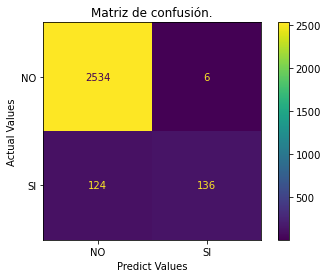

Precision,Recall,Accuracy,F1
0.96,0.52,0.95,0.68


In [10]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True, False],
    'max_depth': [12,13,14,15],
    'max_features': ["auto", "sqrt", "log2"],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [2, 5 , 10],
    'n_estimators': [100, 200]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)
grid.fit(X_train, y_train)

print('Train Accuracy : %.3f'%grid.best_estimator_.score(X_train, y_train))
print('Test Accuracy : %.3f'%grid.best_estimator_.score(X_test, y_test))
print('Best Score Through Grid Search : %.3f'%grid.best_score_)
print('Best Parameters : ',grid.best_params_)

dt = RandomForestClassifier(bootstrap=grid.best_params_['bootstrap'], 
                            max_depth=grid.best_params_['max_depth'],
                            max_features=grid.best_params_['max_features'],
                            min_samples_leaf=grid.best_params_['min_samples_leaf'],
                            min_samples_split=grid.best_params_['min_samples_split'],
                            n_estimators=grid.best_params_['n_estimators']
)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
rf_precision_score, rf_recall_score, rf_accuracy_score, rf_f1_score = evaluate_model('Random forest optimizado', y_test, y_pred)


In [11]:
print('Best Parameters : ',grid.best_params_)

Best Parameters :  {'bootstrap': False, 'max_depth': 15, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


Support Vector Machine.

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Train Accuracy : 0.908
Test Accuracy : 0.907
Best Score Through Grid Search : 0.908
Best Parameters :  {'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}


rbf

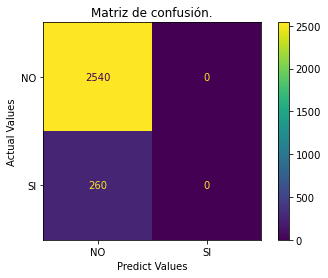

D:\Users\nico_\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



Precision,Recall,Accuracy,F1
0.00,0.00,0.91,0.00


Fitting 5 folds for each of 120 candidates, totalling 600 fits
Train Accuracy : 0.908
Test Accuracy : 0.907
Best Score Through Grid Search : 0.908
Best Parameters :  {'C': 0.001, 'coef0': 0.01, 'gamma': 0.01, 'kernel': 'sigmoid'}


sigmoid

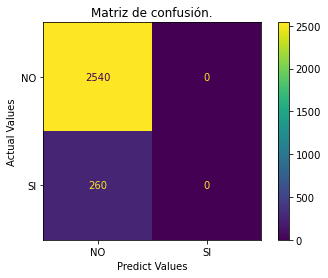

D:\Users\nico_\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



Precision,Recall,Accuracy,F1
0.00,0.00,0.91,0.00


In [12]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

#parameters = [{'kernel': ['rbf'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],'C': [0.001, 0.10, 0.1, 10 ]},
#              {'kernel': ['sigmoid'], 'gamma': [1e-2, 1e-3, 1e-4, 1e-5],'C': [0.001, 0.10, 0.1, 10], 'coef0 ':[0,0.1,1]},
#              {'kernel': ['linear'], 'C': [0.001, 0.10, 0.1, 1]}     
#]

parameters = [{'kernel': ['rbf'], 'gamma': [1e-2,1e-3,1e-4,1e-5,1e-6],'C': [0.001,0.01,0.1,1,10,100]},
              {'kernel': ['sigmoid'], 'gamma': [1e-2,1e-3,1e-4,1e-5,1e-6],'C': [0.001,0.01,0.1,1,10,100],'coef0' : [0.01,0.1,1,10]},
              #{'kernel': ['linear'], 'C': [0.1,1,10,100]}
              ]

for parameter in parameters:
    param_grid = parameter
    
    grid = GridSearchCV(SVC(), param_grid, n_jobs = -1, verbose = 3)
    grid.fit(X_train, y_train)
    kernel_str = parameter['kernel'][0]
    y_pred = grid.predict(X_test)
    dt = grid
    
    print('Train Accuracy : %.3f'%grid.best_estimator_.score(X_train, y_train))
    print('Test Accuracy : %.3f'%grid.best_estimator_.score(X_test, y_test))
    print('Best Score Through Grid Search : %.3f'%grid.best_score_)
    print('Best Parameters : ',grid.best_params_)

    svm_precision_score, svm_recall_score, svm_accuracy_score, svm_f1_score = evaluate_model(kernel_str, y_test, y_pred)


light_gbm default

light_gbm default

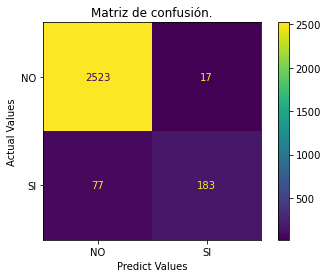

Precision,Recall,Accuracy,F1
0.92,0.70,0.97,0.80


(0.915, 0.7038461538461539, 0.9664285714285714, 0.7956521739130434)

In [13]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

dt=lgb.LGBMClassifier()
dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)
evaluate_model('light_gbm default',y_test, y_pred)

light_gbm con optimizacion bayesiana.

In [14]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from bayes_opt import BayesianOptimization
from sklearn.datasets import load_boston
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')
import hyperopt
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

from sklearn.metrics import roc_auc_score

from sklearn.preprocessing import LabelEncoder
def label_encoder(input_df, encoder_dict=None):
    """ Process a dataframe into a form useable by LightGBM """
    # Label encode categoricals
    categorical_feats = input_df.columns[input_df.dtypes == 'object']
    for feat in categorical_feats:
        encoder = LabelEncoder()
        input_df[feat] = encoder.fit_transform(input_df[feat].fillna('NULL'))
    return input_df, categorical_feats.tolist(), encoder_dict

application_train = X_train.join(y_train)
application_train, categorical_feats, encoder_dict = label_encoder(application_train)

X = application_train.drop('is_fishing', axis=1)
y = application_train.is_fishing


#dtrain = lgb.Dataset(data=X, label=y)

def bayesion_opt_lgbm(X, y, init_iter=3, n_iters=7, random_state=11, seed = 101, num_iterations=100,metric_error='AUC'):
    dtrain = lgb.Dataset(data=X, label=y)

    def lgb_r2_score(preds, dtrain):
        labels = dtrain.get_label()
        return 'r2', r2_score(labels, preds), True

    def auc_score(preds,dtrain):
        labels = dtrain.get_label()
        return 'auc', roc_auc_score(labels, preds), True
        #f = roc_auc_score(y_test, y_score)

    # Objective Function
    #def hyp_lgbm(num_leaves, feature_fraction, bagging_fraction, max_depth, min_split_gain, min_child_weight,lambda_l1, lambda_l2, learning_rate):
    def hyp_lgbm(num_leaves, feature_fraction,   min_split_gain, lambda_l1, lambda_l2, learning_rate):

            params = {'application':'binary','num_iterations': num_iterations,'early_stopping_round':int(50 + 7/learning_rate),
                        'metric':'lgb_r2_score'} # Default parameters

            params["num_leaves"] = int(round(num_leaves))
            params['feature_fraction'] = max(min(feature_fraction, 1), 0)
            #params['bagging_fraction'] = max(min(bagging_fraction, 1), 0)
            #params['max_depth'] = int(round(max_depth))
            params['min_split_gain'] = min_split_gain
            #params['min_child_weight'] = min_child_weight
            
            params['learning_rate']= max(min(learning_rate, 1), 0)
            params['lambda_l1']= lambda_l1
            params['lambda_l2']= lambda_l2
            
            params['verbose']=-1
            params['objective'] ='binary'
            params['boost_from_average']=True #adjusts initial score to the mean of labels for faster convergence
            if metric_error == 'AUC':
                cv_results = lgb.cv(params, dtrain, nfold=3, seed=seed,categorical_feature=[], stratified=False, verbose_eval =None, feval=auc_score)
                return np.max(cv_results['auc-mean'])
            elif metric_error == 'R2':
                cv_results = lgb.cv(params, dtrain, nfold=3, seed=seed,categorical_feature=[], stratified=False, verbose_eval =None, feval=lgb_r2_score)
                return np.max(cv_results['r2-mean'])
                            
            # print(cv_results)
            
    # Domain space-- Range of hyperparameters 
    #https://lightgbm.readthedocs.io/en/latest/Parameters.html

    pds = {
                #'eta':(0.025,0.15),
                'num_leaves': (8, 1024),
                'feature_fraction': (0.1, 1.0),
                #'bagging_fraction': (0.1, 1),
                #'max_depth': (30, 70),
                'min_split_gain': (0.0, 20),
                #'min_child_weight': (10, 50),
                'lambda_l1':(0.0,10),
                'lambda_l2':(0.0,100),
                'learning_rate':(0.01, 0.2)          
                }

    # Surrogate model
    optimizer = BayesianOptimization(hyp_lgbm, pds, random_state=random_state)                  
    # Optimize
    optimizer.maximize(init_points=init_iter, n_iter=n_iters)
    return optimizer.max['params']

parametros_optimos_r2 = bayesion_opt_lgbm(X, y, init_iter=50, n_iters=600, random_state=50, seed = 40, num_iterations = 999999, metric_error='R2')
parametros_optimos_auc = bayesion_opt_lgbm(X, y, init_iter=50, n_iters=600, random_state=50, seed = 40, num_iterations = 999999, metric_error='AUC')

print(parametros_optimos_r2)
print(parametros_optimos_auc)



|   iter    |  target   | featur... | lambda_l1 | lambda_l2 | learni... | min_sp... | num_le... |
-------------------------------------------------------------------------------------------------
[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
|  1        |  0.4608   |  0.5451   |  2.281    |  25.55    |  0.0853   |  7.546    |  1.021e+0 |
|  2        |  0.363    |  0.4674   |  7.719    |  76.05    |  0.0689   |  6.931    |  365.4    |
|  3        |  0.3514   |  0.2309   |  9.727    |  90.92    |  0.1164   |  6.272    |  910.4    |
|  4        |  0.2983   |  0.7071   |  3.911    |  50.72    |  0.1096   |  18.56    |  588.5    |
|  5        |  0.5352   |  0.7015   |  0.5226   |  32.71    |  0.02072  |  3.597    |  948.7    |
|  6        |  0.2681   |  0.9442   |  7.141    |  73.27    |  0.09773  |  18.63    |  420.9    |
|  7        |  0.3117   |  0.7149   |  6.499    |  59.88    |  0.05219  |  13.65    |  900.1    |
|  8

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003681 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11656
[LightGBM] [Info] Number of data points in the train set: 11196, number of used features: 51
[LightGBM] [Info] Start training from score 0.091640
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best g

light_gbm optimizacion bayesiana r2

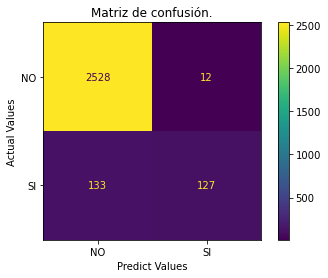

Precision,Recall,Accuracy,F1
0.91,0.49,0.95,0.64


light_gbm optimizacion bayesiana auc

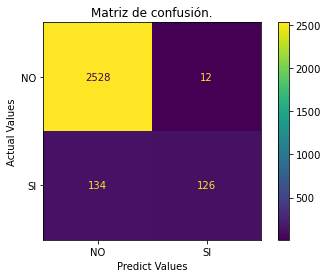

Precision,Recall,Accuracy,F1
0.91,0.48,0.95,0.63


In [15]:
#parametros_optimos['max_depth'] = int(round(parametros_optimos['max_depth']))
parametros_optimos_r2['num_leaves'] = int(round(parametros_optimos_r2['num_leaves']))
parametros_optimos_auc['num_leaves'] = int(round(parametros_optimos_auc['num_leaves']))


dtrain = lgb.Dataset(data=X, label=y)
def lgb_r2_score(preds, dtrain):
        labels = dtrain.get_label()
        return 'r2', r2_score(labels, preds), True

def auc_score(preds,dtrain):
        labels = dtrain.get_label()
        return 'auc', roc_auc_score(labels, preds), True
        
#dt = lgb.train(parametros_optimos,  dtrain,categorical_feature=[], verbose_eval =None, feval=lgb_r2_score)
dt_r2 = lgb.train(parametros_optimos_r2,  dtrain,categorical_feature=[], verbose_eval =None, feval=lgb_r2_score)
dt_auc = lgb.train(parametros_optimos_auc,  dtrain,categorical_feature=[], verbose_eval =None, feval=auc_score)

#clf = lgb.fit(parametros_optimos,  dtrain,categorical_feature=[], verbose_eval =None, feval=lgb_r2_score)

#lgb.plot_importance(dt)

y_pred = dt_r2.predict(X_test)
#if>=0.5 ---> 1
#else ---->0
#rounding the values
y_pred=y_pred.round(0)
y_pred=y_pred.astype(int)
y_pred = np.where(y_pred == 1, 'SI', 'NO')
lgbm_precision_score_r2, lgbm_recall_score_r2, lgbm_accuracy_score_r2, lgbm_f1_score_r2 = evaluate_model('light_gbm optimizacion bayesiana r2',y_test, y_pred)

y_pred = dt_auc.predict(X_test)
#if>=0.5 ---> 1
#else ---->0
#rounding the values
y_pred=y_pred.round(0)
y_pred=y_pred.astype(int)
y_pred = np.where(y_pred == 1, 'SI', 'NO')
lgbm_precision_score_auc, lgbm_recall_score_auc, lgbm_accuracy_score_auc, lgbm_f1_score_auc = evaluate_model('light_gbm optimizacion bayesiana auc',y_test, y_pred)

#print(y_pred)

#cols = feature_importance_df_lgb[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False)[:50].index


Plotting feature importances...


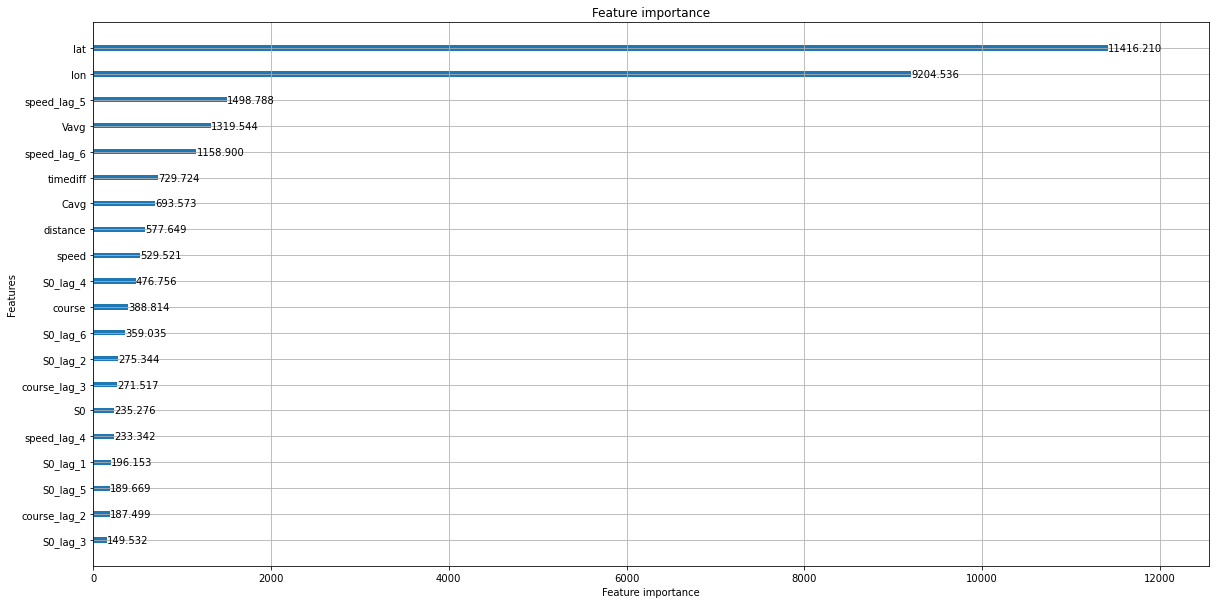

<Figure size 7200x720 with 0 Axes>

In [16]:
print('Plotting feature importances...')
ax = lgb.plot_importance(dt_r2, max_num_features=20,importance_type ='gain',figsize=(20, 10) )
plt.figure(figsize=(100, 10))
plt.show()

Plotting feature importances...


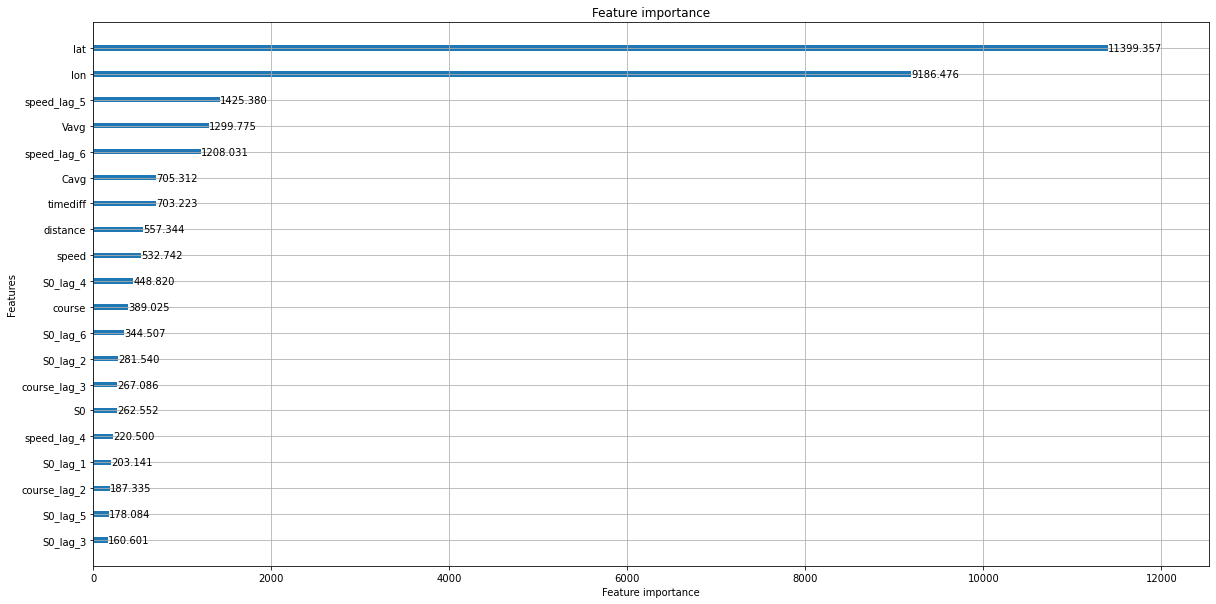

<Figure size 7200x720 with 0 Axes>

In [17]:
print('Plotting feature importances...')
ax = lgb.plot_importance(dt_auc, max_num_features=20,importance_type ='gain',figsize=(20, 10) )
plt.figure(figsize=(100, 10))
plt.show()

In [18]:
from IPython.display import Markdown as md
md(f'''| Algorithm     | Precision     | Recall        | Accuracy      | F1            |
| ------------- | ------------- | ------------- | ------------- | ------------- |
| Arboles de decision  |{dt_precision_score:.3f}|	{dt_recall_score:.3f}|	{dt_accuracy_score:.3f}|	{dt_f1_score:.3f}|
|Random Forest       |{rf_precision_score:.3f} |	{rf_recall_score:.3f}|	{rf_accuracy_score:.3f}|	{rf_f1_score:.3f}|
|    SVM        | {svm_precision_score:.3f} |	{svm_recall_score:.3f}|	{svm_accuracy_score:.3f}|	{svm_f1_score:.3f}
| LightGBM_r2      |{lgbm_precision_score_r2:.3f}|	{lgbm_recall_score_r2:.3f}|	{lgbm_accuracy_score_r2:.3f}|	{lgbm_f1_score_r2:.3f}|
| LightGBM_auc      |{lgbm_precision_score_auc:.3f}|	{lgbm_recall_score_auc:.3f}|	{lgbm_accuracy_score_auc:.3f}|	{lgbm_f1_score_auc:.3f}|
'''
       )


| Algorithm     | Precision     | Recall        | Accuracy      | F1            |
| ------------- | ------------- | ------------- | ------------- | ------------- |
| Arboles de decision  |0.795|	0.700|	0.955|	0.744|
|Random Forest       |0.958 |	0.523|	0.954|	0.677|
|    SVM        | 0.000 |	0.000|	0.907|	0.000
| LightGBM_r2      |0.914|	0.488|	0.948|	0.637|
| LightGBM_auc      |0.913|	0.485|	0.948|	0.633|
